In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

<b>This dataset is about students performance during exams. There are 8 columns in this table: gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score. Here the scores are between 1 and 100, two genders, and 5 races/ethnicities.</b>

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

# I used this dataset during ML course
# I tried to predict if student will pass or fail based on other features
# I used logistic regression for this task

<b>https://www.kaggle.com/code/zabihullah18/student-performance/input</b><br>
<b>Here is he source of the data</b>

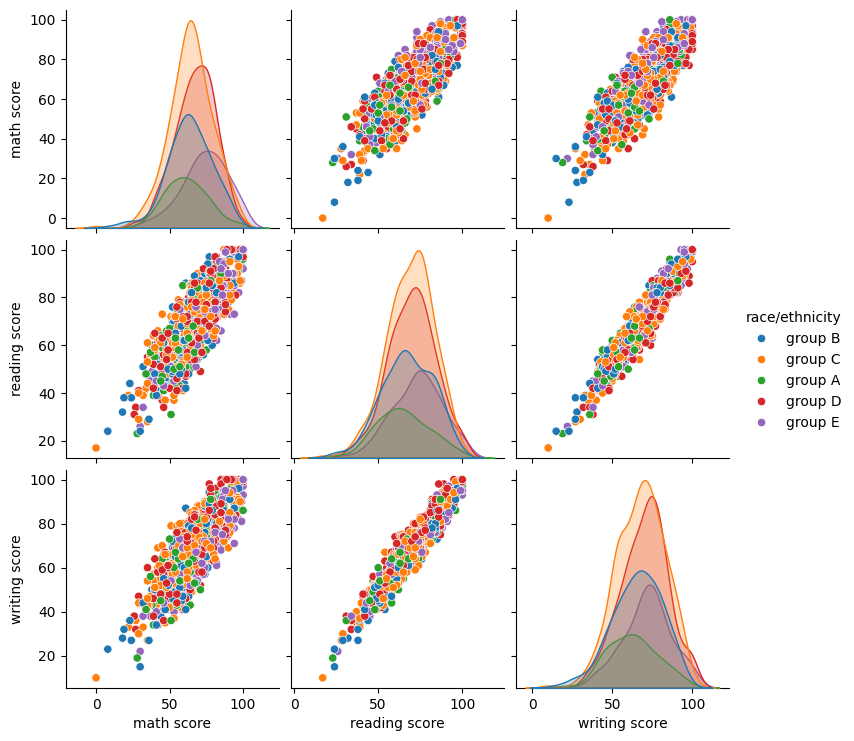

In [3]:
from seaborn import pairplot
pairplot(df, hue='race/ethnicity')

<b>During my research, I strugled to make good ML model, and that is pretty much because of overlaping in the data. For example here is the hue on race/ethnicity, and it is messed up a lot. Clearly nowadays it does not really matter what is your race or ethnicity, as there is no group that is significantly better than any other.</b>

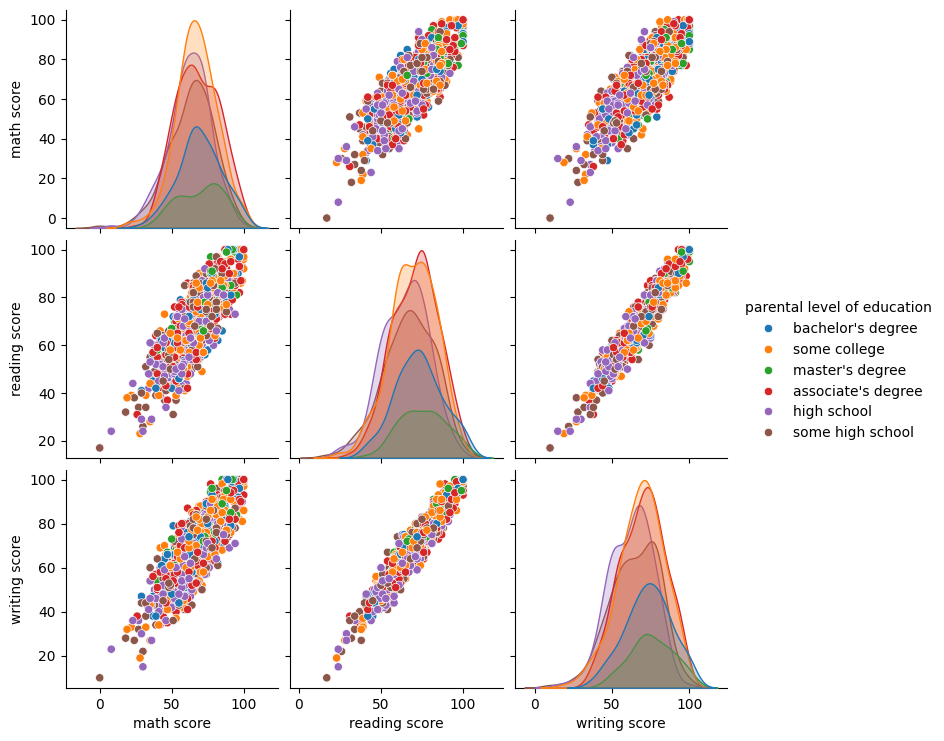

In [4]:
from seaborn import pairplot
pairplot(df, hue='parental level of education')

<b>Same goes for parental level of education, surprisingly it does not really matter what kind of background you have, exams are exams.</b>

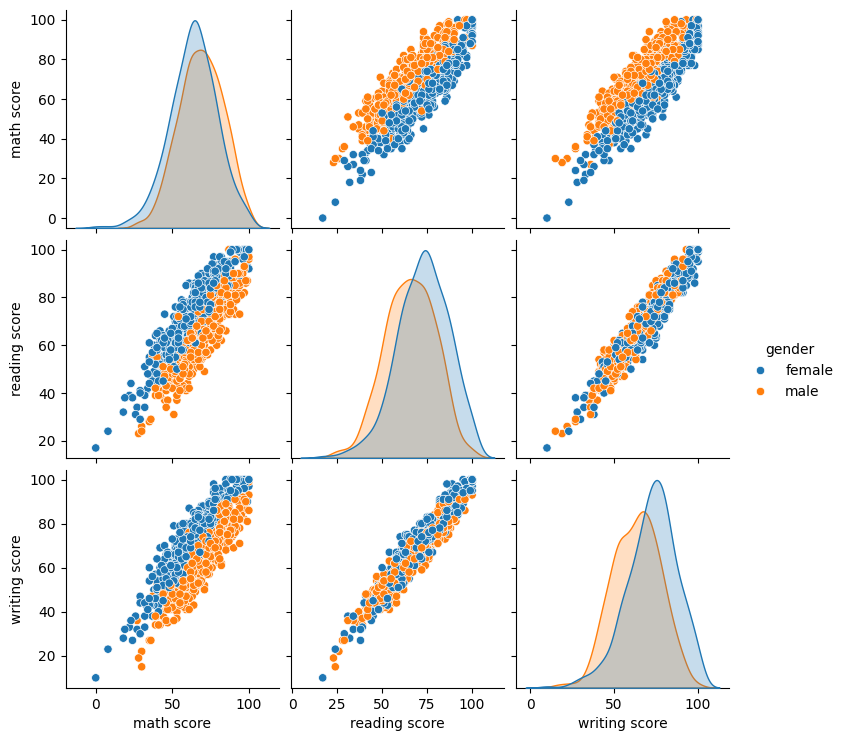

In [5]:
from seaborn import pairplot
pairplot(df, hue='gender')

<b>As for gender, we can see that male students are better in math, and female students are slightly better in reading and writing.</b>

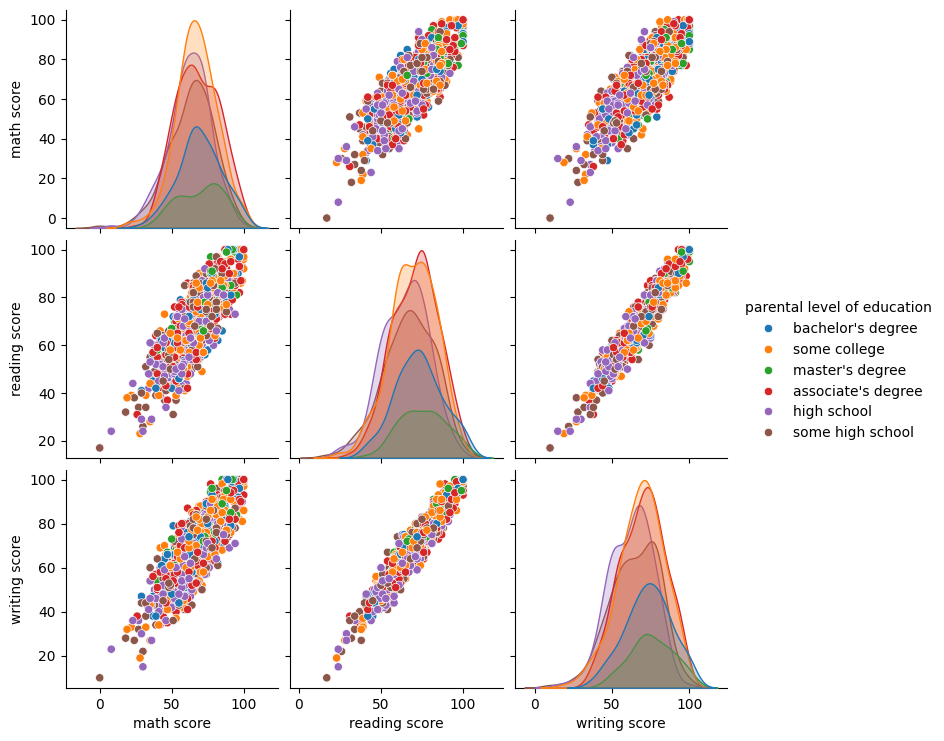

In [8]:
from seaborn import pairplot
pairplot(df, hue='parental level of education')

<b>Even parental level of education does not tell us much.</b>

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<b>Luckly there are no missing values</b>

In [47]:
df['Sum'] = df['math score'] + df['reading score'] + df['writing score']
df.drop(['math score', 'reading score', 'writing score'], axis=1, inplace=True)
df.head()

# creating a new column to store the sum of the scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Sum
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


<b>Then I summed up the scores, dropped out other scores and tried to predict overall resut of all three exams based on other features.</b>

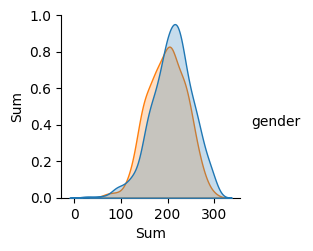

In [48]:
from seaborn import pairplot
sns.pairplot(df, hue='gender')

<b>As we see, overall results are almost equal (there just more female students than male ones)</b>

In [49]:
df.describe()

# lets check value counts of the columns and replace the values with 1 and 0 to simplify the model

,Sum
count,1000.000000
mean,203.312000
std,42.771978
min,27.000000
25%,175.000000
50%,205.000000
75%,233.000000
max,300.000000


In [50]:
df.duplicated().sum()

16

In [51]:
df = df.drop_duplicates()

<b>Dropped duplicates</b>

In [52]:
df['parental level of education'].value_counts()

parental level of education
some college          220
associate's degree    217
high school           195
some high school      178
bachelor's degree     115
master's degree        59
Name: count, dtype: int64

In [53]:
df['parental level of education'].replace(['some high school', 'high school', 'some college'], 0, inplace=True)
df['parental level of education'].replace(["associate's degree", "bachelor's degree", "master's degree"], 1, inplace=True)

C:\Users\Roman\AppData\Local\Temp\ipykernel_21536\304411056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parental level of education'].replace(['some high school', 'high school', 'some college'], 0, inplace=True)
C:\Users\Roman\AppData\Local\Temp\ipykernel_21536\304411056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parental level of education'].replace(["associate's degree", "bachelor's degree", "master's degree"], 1, inplace=True)


<b>Replaced values in parental level of education for 1 and 0, so it would be easier to make predictions (like school or university degree)</b>

In [54]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    310
group D    260
group B    188
group E    138
group A     88
Name: count, dtype: int64

In [55]:
variables = ['race/ethnicity']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

# used one hot encoding to convert race to numerical values

In [56]:
df['lunch'].replace(['standard'], 1, inplace=True)
df['lunch'].replace(['free/reduced'], 0, inplace=True)

<b>Replaced values for lunch (again 1 and 0)</b>

In [57]:
df['test preparation course'].value_counts()

test preparation course
none         631
completed    353
Name: count, dtype: int64

In [58]:
df['test preparation course'].replace(['none'], 0, inplace=True)
df['test preparation course'].replace(['completed'], 1, inplace=True)

In [59]:
df['gender'].value_counts()

gender
female    509
male      475
Name: count, dtype: int64

In [60]:
df['gender'].replace(['female'], 0, inplace=True)
df['gender'].replace(['male'], 1, inplace=True)

<b>Replaced values in gender for numerical also.</b>

In [61]:
df.head()

,gender,parental level of education,lunch,test preparation course,Sum,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,1,0,218,0,1,0,0,0
1,0,0,1,1,247,0,0,1,0,0
2,0,1,1,0,278,0,1,0,0,0
3,1,1,0,0,148,1,0,0,0,0
4,1,0,1,0,229,0,0,1,0,0


<b>Down is ML part, I guess not very related to this course task, so</b>

<h3>As a result, this is hard dataset to make model with, I am not sure, what to add, I was surprised that even parental level of education did not correlate much with overall result of the exam. Otherwise the data is reather simple to handle, and easy to understand.</h3>

In [62]:
df['Sum'] = df['Sum'].apply(lambda x: 1 if x > 205 else 0)

# lets assume that a student passes if the sum of the scores is greater than 205

In [63]:
df['Sum'].value_counts()
# half of the students will pass the exam

Sum
0    494
1    490
Name: count, dtype: int64

In [64]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'Sum', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E'],
      dtype='object')

In [65]:
# df = df[df['Sum'] < df['Sum'].quantile(0.97)]

# decided not to remove outliers as it ruins the model

In [66]:
X = df.drop('Sum', axis=1)

# have only the target variable here (dependent variable)
y = df['Sum']

In [67]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [70]:
predictions = logmodel.predict(X_test)

In [71]:
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# the model is quite accurate, 70%

              precision    recall  f1-score   support

           0       0.67      0.62      0.65       165
           1       0.57      0.62      0.59       131

    accuracy                           0.62       296
   macro avg       0.62      0.62      0.62       296
weighted avg       0.63      0.62      0.62       296


Model overall accuracy: 62.16%


[[103  62]
 [ 50  81]]


<Axes: >

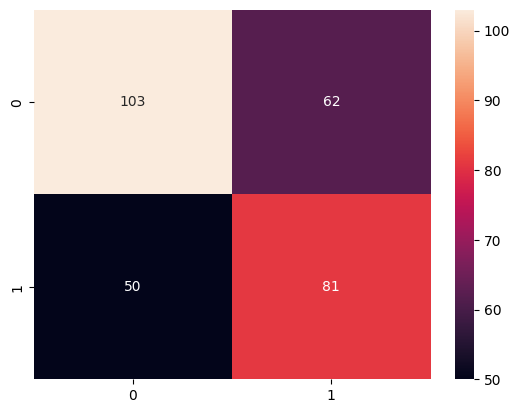

In [72]:
print(confusion_matrix(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [73]:
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

0.7289948773031479

<Axes: >

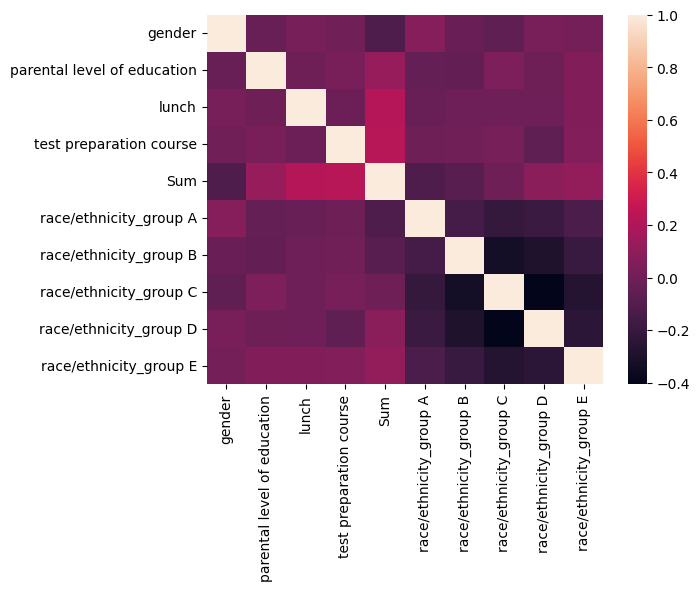

In [74]:
sns.heatmap(df.corr())

In [75]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'Sum', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E'],
      dtype='object')

In [76]:
tester_row = {
    'gender': 0,
    'parental level of education': 0,
    'lunch': 0,
    'test preparation course': 0,
    'race/ethnicity_group A': 1,
    'race/ethnicity_group B': 0,
    'race/ethnicity_group C': 0,
    'race/ethnicity_group D': 0,
    'race/ethnicity_group E': 0,
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

labels = [
    "Not Pass",
    "Pass"
]

print("Pass?:")
exam_prediction = logmodel.predict(tester_row)
result = labels[exam_prediction[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.87059321 0.12940679]]

Pass?:
Not Pass
-------------------
